## 5. Resolução de EDOs de 1ª ordem com SymPy

Resolver uma equação diferencial consiste em determinar uma função que satisfaça a equação. A seguir vamos ver alguns exemplos usando a biblioteca SymPy para computar algumas expressões. Para isso preciamos importar a biblioteca executando as duas linhas de código mostradas abaixo.

In [1]:
import sympy as sp
sp.init_printing()

**Exemplo 4.1:** Vamos verificar se $\theta(t) = \cos\left(\sqrt{\frac{g}{l}}t\right)$ é solução da equação do pêndulo 

$$
l\frac{d^2\theta(t)}{dt^2} = -g\theta(t)
$$


In [5]:
# definido os símbolos
t,g,l = sp.symbols('t,g,l') 

In [6]:
# entrando com a função theta
theta = sp.cos(sp.sqrt(g/l)*t)

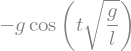

In [8]:
# lado esquerdo da equação (derivada segunda)
l*theta.diff(t, t)

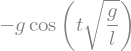

In [7]:
# lado direito
-g*theta

Podemos ver que que a função $\theta(t)$ satisfaz a equação, pois derivando duas vezes e substituindo, o lado direito e o lado esquerdo da equação são inguais.

A seguir mais alguns exemplos de como usar `sympy`para exibir expressões matemáticas em um formato matemático tradicional. 

In [9]:
# definido o símbolo theta para a função
theta_symbol = sp.Function('theta')(t) 

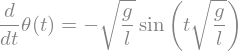

In [10]:
# exibindo uma equação para a derivada primeira
sp.Eq(theta_symbol.diff(t), theta.diff(t))

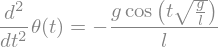

In [11]:
# exibindo uma equação para a derivada segunda
sp.Eq(theta_symbol.diff(t,t), theta.diff(t,t))

Observe o que ocorre se entramos com a equação de forma simbólica:

In [ ]:
sp.Eq(l*theta.diff(t,t), -g*theta)

O resultado acima confirma que a função $\theta(t)$ dada é realmente solução da equação do pêndulo.

Alguns métodos analíticos para resolução de EDOs são os métodos: usando fator integrante, método das variáveis separáveis e método para equações exatas.

### 5.1 Fator integrante

Para utilizar o método do **fator integrante**, a EDO deve se apresentar da seguinte forma:

$$y'+p(t)y=g(t)$$

O método consiste em multiplicar ambos os lados da equação por $\mu(t)=e^{\int p(t)dt}$ e integrar, então chega-se à solução geral

$$y(t)=\frac{\int \mu(t)g(t)dt+c}{\mu(t)}.$$

Uma solução particular pode ser obtida calculando o valor da constante $c$ a partir de um valor inicial $y(t_0)=y_0$ dado.

**Exemplo 1:** Dada a equação $y'-y=2te^{2t}$, encontre a solução particular sabendo que $y(0)=1$. 

_Solução:_ Multiplicando ambos os lados da equação por $\mu(t)=e^{\int -1 dt}= e^{-t}$ obtém-se

$$y'e^{-t}-ye^{-t}=2te^{2t}e^{-t}$$
ou

$$\frac{d}{dt}\left[ye^{-t} \right]=2te^t$$

Integrando ambos os lados obtemos $ye^{-t}=\int 2te^t dt$ que, integrando por partes, resulta em 

$$y = 2te^{2t}-2e^{2t}+c$$

Como $y(0)=1$, então $c=3$. Logo a solução particular é 

$$y = 2te^{2t}-2e^{2t}+3$$

Usando SymPy:

In [68]:
import sympy as sp
sp.init_printing(use_unicode=True)

In [69]:
# Define os simbolos e funções
t,C1 = sp.symbols('t C1')
y = sp.Function('y')
dy = sp.Derivative(y(t),t)

# Define a equação e resolve
eq = sp.Eq(dy-y(t), 2*t*sp.exp(2*t))
sol = sp.dsolve(eq)
display(sol)

In [70]:
sol = sp.expand(sol)
display(sol)

In [71]:
eq = sp.Eq(sol.rhs.subs(t,0),1)
eq

In [72]:
sp.solveset(eq, C1)

Plotando a função para diversos valores de $c$ e a solução particular no intervalo de -1 a 1 obtemos:

In [73]:
import numpy as np
import matplotlib.pyplot as plt

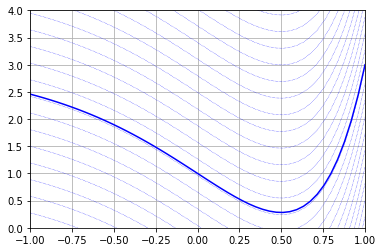

In [74]:
t = np.linspace(-1,1)

for c1 in np.linspace(-5,10):
    y = 2*t*np.exp(2*t) - 2*np.exp(2*t)+ c1
    plt.plot(t,y,'b:',lw=0.5)

y = 2*t*np.exp(2*t) - 2*np.exp(2*t)+3
plt.plot(t,y,'b')

plt.ylim(0,4)
plt.xlim(-1,1)
plt.grid()
plt.show()

**Exemplo 2:** Resolvendo a equação $y' + y = \cos(t)$ usando o fator integrante obtém-se $y(t) = c e^{-t} + \frac{\cos(t) + \sin(t)}{2}$ em que $c$ é determinada pela condição inicial $y(0) = c+1/2$. Vamos plotar as soluções de $y(t)$ no intervalo $0 \leq t \leq 10$ para os valores iniciais $y(0)=-3,-2,-1,0,1,2,3$.

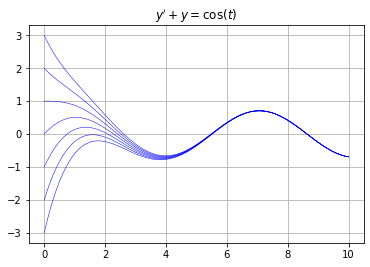

In [75]:
t = np.linspace(0,10,100)
for y0 in range(-3,4):
    c = y0 - 1/2
    y = c*np.exp(-t) + (np.cos(t) + np.sin(t))/2
    plt.plot(t,y,'b', lw = 0.5)
plt.title("$y' + y = \cos(t)$"), plt.grid(True)
plt.show()

Nos exemplos acima, conseguimos encontrar a solução geral da equação diferencial de primeira ordem e plotar a solução para diferentes valores iniciais. No entanto, **a maioria das equações diferenciais não pode ser resolvida explicitamente** com funções elementares. Para esses casos sempre podemos aproximar soluções com métodos numéricos e métodos gráficos.

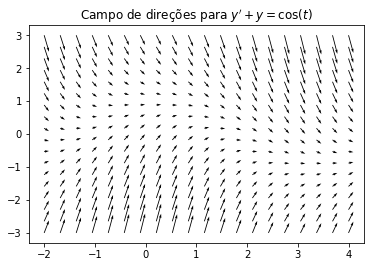

In [76]:
t = np.linspace(-2,4, 20)
y = np.linspace(-3, 3, 18)

tm, ym = np.meshgrid(t, y)

dy = np.cos(tm)-ym
dt = np.ones(dy.shape)

plt.title("Campo de direções para $y' + y = \cos(t)$")
plt.quiver(tm,ym,dt,dy,width=0.0025)
plt.show()

**Exercícios ([fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/124/42)):**

**1.** Para cada uma das equações, plote o campo de direções, então, descreva o comportamento das soluções para valores grandes de $t$. Em seguida, encontre a solução geral, e use-a para determinar o comportamento das soluções quando $t \rightarrow \infty$. Plote algumas soluções particulares.

$$
\begin{aligned}
& \text{(a)}\quad y^{\prime}+3 y=t+e^{-2 t} \\
& \text{(b)}\quad y^{\prime}-2 y=t^2 e^{2 t} \\
& \text{(c)}\quad y^{\prime}+y=t e^{-t}+1 \\
& \text{(d)}\quad y^{\prime}+\frac{1}{t} y=3 \cos (2 t), \quad t>0 \\
& \text{(e)}\quad y'+xy=x
\end{aligned}
\quad \quad \quad
\begin{aligned}
& \text{(f)}\quad y^{\prime}-2 y=3 e^t \\
& \text{(g)}\quad t y^{\prime}-y=t^2 e^{-t}, \quad t>0 \\
& \text{(h)}\quad y^{\prime}+y=5 \operatorname{sen}(2 t) \\
& \text{(i)}\quad 2 y^{\prime}+y=3 t^2\\
& \text{(j)}\quad y'+3x^2y=sen(x)e^{-x^3}
\end{aligned}
$$

**2.** Encontre a solução do problema de valor inicial dado.

$$
\begin{aligned}
& \text{(a)}\quad y^{\prime}-y=2 t e^{2 t}, y(0)=1 \\
& \text{(b)}\quad y^{\prime}+2 y=t e^{-2 t}, y(1)=0 
\end{aligned}
\quad \quad \quad
\begin{aligned}
& \text{(c)}\quad y^{\prime}+\frac{2}{t} y=\frac{\cos t}{t^2}, y(\pi)=0, t>0 \\
& \text{(d)}\quad  t y^{\prime}+(t+1) y=t, y(\ln 2)=1, t>0
\end{aligned}
$$


### Variáveis separáveis

Dizemos que uma EDO de 1ª ordem é de **variáveis separáveis** se puder ser escrita na forma

$$ y' = f(t) g(y)$$

nesse caso, escrevemos 

$$\frac{dy}{dt} = f(t) g(y)$$

ou 

$$\frac{1}{g(y)}dy = f(t)dt $$

e integramos o lado esquerdo em relação à $y$ e o lado direito em relação à $t$ para obter a solução, ou seja, fazemos

$$\int \frac{1}{g(y)}\,dy = \int f(x) \,dx + c $$

Vejamos um exemplo:

**Exemplo 3:** Seja a equação $y'=xy$, tem-se que $y=0$ é uma solução, para encontrar uma expressão para a solução geral, com $y \neq 0$ podemos usar o método de separação de variáveis fazendo

$$\int \frac{dy}{y} = \int x\,dx$$

$$\ln \, \lvert y\rvert = \frac{x^2}{2} + C$$

$$ \lvert y \rvert = e^{\frac{x^2}{2} + C} = e^{\frac{x^2}{2}} e^C = D e^{\frac{x^2}{2}}$$

Assim, para uma constante $D > 0$ a solução é
$$y = D e^{\frac{x^2}{2}}$$

Podemos usar `sympy` para obter as integrais

In [94]:
x,y,C,D = sp.symbols('x,y,C, D')
sp.integrate(1/y, y)

In [95]:
sp.integrate(x, x)

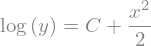

In [97]:
eq = sp.Eq(sp.integrate(1/y, y),sp.integrate(x, x)+C)
eq

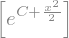

In [98]:
sol = sp.solve(eq,y)
display(sol)

In [100]:
sol[0].subs(sp.exp(C),D)

**Exemplo 4:** Vamos agora resolver $x^2y' = 1 - x^2+y^2 - x^2y^2$ com  $y(1) = 0$ fatorando o lado direito e separando as variáveis.

$$x^2y' = (1 - x^2)(1+y^2)$$

$$\frac{y'}{1+y^2} = \frac{1 - x^2}{x^2} $$

$$\frac{y'}{1+y^2}  = \frac{1}{x^2} - 1 $$

$$\arctan (y)  = \frac{-1}{x} - x + C $$

$$y = \tan \left(\frac{-1}{x} - x + C\right)$$

Aplicando a condição inicial chegamos a 

$$y = \tan \left(\frac{-1}{x} - x + 2 \right)$$

Usando `sympy` para obter as integrais:

In [39]:
integrate(1/(1+y**2), y)

atan(y)

In [40]:
integrate(1/(x**2) -1, x)

     1
-x - ─
     x

**Exercícios ([fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/236/7:117%5BExe%2Cmpl%5D)):**

**1.** Para cada uma das equações encontre a solução geral. Plote algumas soluções particulares.

$$
\begin{aligned}
& \text{(a)}\quad y^{\prime}=\frac{x^2}{y} \\
& \text{(b)}\quad y^{\prime}+y^2 \operatorname{sen} x=0 \\
& \text{(c)}\quad y^{\prime}=\cos ^2(x) \cos ^2(2y) \\ 
& \text{(d)}\quad x y^{\prime}=\left(1-y^2\right)^{1 / 2} 
\end{aligned}
\quad \quad \quad
\begin{aligned}
& \text{(e)}\quad \frac{d y}{d x}=\frac{x-e^{-x}}{y+e^y}\\
& \text{(f)}\quad \frac{d y}{d x}=\frac{x^2}{1+y^2} 
\end{aligned}
\quad \quad \quad
\begin{aligned}
& \text{(g)}\quad \frac{d y}{d x}=\frac{y}{x} \\
& \text{(h)}\frac{d y}{d x}=\frac{-x}{y}
\end{aligned}
$$



**2.** Encontre a solução do problema de valor inicial dado. Plote algumas soluções e a solução particular do PVI.

$$
\begin{aligned}
& \text{(a)}\quad y^{\prime}=(1-2 x) y^2, y(0)=-1 / 6 \\
& \text{(b)}\quad y^{\prime}=(1-2 x) / y, y(1)=-2 \\
& \text{(c)}\quad x d x+y e^{-x} d y=0, \quad y(0)=1 \\
& \text{(e)}\quad d r / d \theta=r^2 / \theta, \quad r(1)=2 \\
\end{aligned}
\quad \quad \quad
\begin{aligned}
& \text{(f)}\quad y^{\prime}=x y^3\left(1+x^2\right)^{-1 / 2}, y(0)=1 \\
& \text{(g)}\quad y^{\prime}=2 x /(1+2 y), \quad y(2)=0 \\
& \text{(h)}\quad y^{\prime}=\left(3 x^2-e^x\right) /(2 y-5), \quad y(0)=1 \\
& \text{(i)}\quad \operatorname{sen}(2 x) d x+\cos (3 y) d y=0, \quad y(\pi / 2)=\pi / 3
\end{aligned}
$$




### Equações exatas
As **equações diferenciais exatas** são aquelas que podem ser colocadas na forma

$$M(x,y)+N(x,y)y'=0$$

em que  $M_y(x,y) = N_x(x,y)$. o que significa que existe uma função $\psi (x, y)$ tal que $\psi_x=M$ e $\psi_y=N$.


Suponha que possamos identificar uma função $\psi (x, y)$ tal que $\psi_x=M$ e $\psi_y=N$ e a função $y(x)$, diferenciável em $x$, é definida implicitamente por $\psi(x,y)=c$, então podemos escrever 

$$M(x,y)+N(x,y)y'= \frac{\partial \psi}{\partial y}+\frac{\partial \psi}{\partial y}\frac{dy}{dx}=\frac{d}{dx} \psi(x,y(x))$$

Então a equação diferencial a ser resolvida fica

$$\frac{d}{dx} \psi(x,y(x)) = 0$$


É possível obter uma expressão explícita para $\psi (x, y)$ integrando $\psi_x=M$  em relação a $x$, incluindo uma função arbitrária $h(y)$ em vez de uma constante arbitrária, depois diferenciaando o resultado em relação a $y$ e igualeando $N$. Então, usando esta última equação para resolver para $h(y)$. O próximo exemplo ilustra esse procedimento.

Vejamos um exemplo.

**Exemplo 5:** Vamos resolver a equação 

$$2x+y^2+2xyy'=0 \text.$$

Primeiramente notemos que para $\psi(x,y)=x^2+xy^2$ tmos que $\psi_x = 2x+y^2$ e $\psi_y=2xy$, então, a equação pode ser escrita como 

$$ \frac{\partial \psi}{\partial y}+\frac{\partial \psi}{\partial y}\frac{dy}{dx}=0$$

considerando que $y$ é função de $x$ e usando a regra da cadeia podemos escrever

$$ \frac{\partial \psi}{\partial x}(x,y)=\frac{d}{dx}(x^2+xy^2)=0$$

que integrando obtem-se a solução geral

$$ \psi(x,y)=x^2+xy^2=c \text.$$

ou

$$ y(x) = \pm \sqrt{\frac{c}{x}-x}$$


In [41]:
t, l = sp.symbols('t lambda')
y = sp.Function('y')(x)

expr = sp.Eq(2*x+y*y+2*x*y*y.diff(x),0)
expr

         d                 2       
2⋅x⋅y(x)⋅──(y(x)) + 2⋅x + y (x) = 0
         dx                        

In [27]:
sym.dsolve(expr)

⎡            ________             ________⎤
⎢           ╱ C₁                 ╱ C₁     ⎥
⎢y(x) = -  ╱  ── - x , y(x) =   ╱  ── - x ⎥
⎣        ╲╱   x               ╲╱   x      ⎦

Algumas vezes, é possível converter uma equação diferencial que não é exata em uma exata multiplicando-se a equação por um **fator integrante** apropriado. 

Por exemplo, se $(M_y – N_x)/N$ for uma função só de $x$, então existirá um fator integrante $\mu$ que também só depende de $x$. Além disso, $\mu(x)$ pode ser encontrado resolvendo-se a equação linear e separável

$$\frac{d\mu}{dx} = \frac{M_y-N_x}{N}\mu $$

Um procedimento semelhante pode ser usado para determinar uma condição sob a qual a equação diferencial tenha um fator integrante que depende só de $y$ (Ver exemplos p.51 e p.52 do Boyce, 2020).

**Exercícios:**
Para resolver uma simples equação diferencial de 1ª ordem, como por exemplo $y'+y=0$, $y=y(t)$, podemos proceder da seguinte maneira:

In [110]:
# definindo a variavel independente como símbolo
t = sp.symbols('t')

# definido uma função com classe Functiol
y = sp.Function('y')(t)

# definindo a equação em que y'=
eq = y.diff(t)+y

# resolvendo a equacao
sp.dsolve(eq, y)

**Exercícios ([fonte](& \text{(e)}\quad \frac{d y}{d x}=-\frac{a x-b y}{b x-c y} \\)):** Determine se cada uma das equações é exata. Se for, encontre a solução. Plote.

$$
\begin{aligned}
& \text{(a)}\quad (2 x+3)+(2 y-2) y^{\prime}=0 \\
& \text{(b)}\quad (2 x+4 y)+(2 x-2 y) y^{\prime}=0 \\
& \text{(c)}\quad \left(3 x^2-2 x y+2\right)+\left(6 y^2-x^2+3\right) y^{\prime}=0 \\
& \text{(d)}\quad \frac{d y}{d x}=-\frac{a x+b y}{b x+c y} 
\end{aligned}
\quad \quad \quad
\begin{aligned}
& \text{(e)}\quad \frac{d y}{d x}=-\frac{a x-b y}{b x-c y} \\
& \text{(f)}\quad \left(y e^{x y} \cos (2 x)-2 e^{x y} \operatorname{sen}(2 x)+2 x\right)+\left(x e^{x y} \cos (2 x)-3\right) y^{\prime}=0 \\
& \text{(g)}\quad (y / x+6 x)+(\ln x-2) y^{\prime}=0, x>0 \\
& \text{(h)}\quad \frac{x}{\left(x^2+y^2\right)^{3 / 2}}+\frac{y}{\left(x^2+y^2\right)^{3 / 2}} \frac{d y}{d x}=0
\end{aligned}
$$


Vejamos mais alguns exemplos.

**Exemplo 6:**

(a) $\frac{d y}{d x}=\frac{x^2}{1-y^2}$ , solução: $-x^3+3 y-y^3=c$ ([fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/154/2%4052:61)).

In [102]:
from sympy import var, plot_implicit, Eq

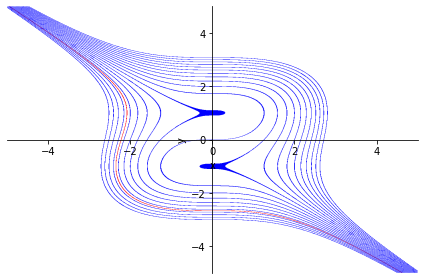

In [103]:
var('x y')

fig = plot_implicit(Eq(-x**3+3*y-y**3, 11), line_color='r',
                    show=False)

for c in range(-20,20,2):
    eq = Eq(-x**3+3*y-y**3, c)
    fig.append(plot_implicit(eq,show=False)[0])
fig.show()

(b) $\frac{d y}{d x}=\frac{3 x^2+4 x+2}{2(y-1)}, y(0)=-1$, solução: $y=\phi(x)=1-\sqrt{x^3+2 x^2+2 x+4}$, ([fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/204/2/1:7%5BPLO%2C%202%5D))

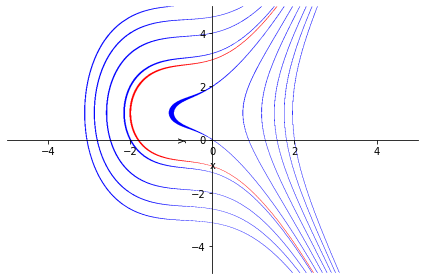

In [104]:
fig = plot_implicit(Eq(y**2-2*y, x**3+2*x**2+2*x+3),
                    line_color='red',
                    show=False)

for c in range(-20,20,4):
    eq = Eq(y**2-2*y, x**3+2*x**2+2*x+c)
    fig.append(plot_implicit(eq,show=False)[0])
fig.show()

(c) $\frac{d y}{d x}=\frac{4 x-x^3}{4+y^3}$, solução: $y^4+16 y+x^4-8 x^2=c$, ([fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/206/32/4))

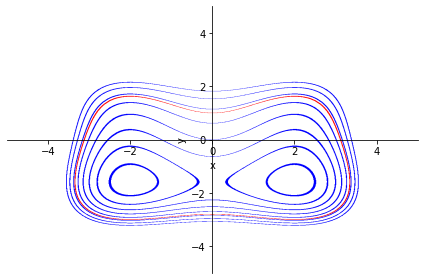

In [105]:
var('x y')
fig = plot_implicit(Eq(y**4+16*y+x**4-8*x**2,17),
                    line_color='red',
                    show=False)

for c in range(-50,50,10):
    eq = Eq(y**4+16*y+x**4-8*x**2, c)
    fig. extend(plot_implicit(eq,show=False))
fig.show()

In [107]:
import matplotlib.pyplot
from numpy import arange
from numpy import meshgrid

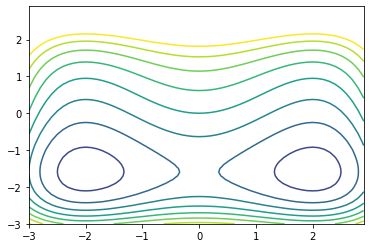

In [108]:
xrange = arange(-3, 3, 1)
yrange = arange(-3, 3, 1)
X, Y = meshgrid(xrange,yrange)

delta = 0.1
xrange = arange(-3, 3, delta)
yrange = arange(-3, 3, delta)
X, Y = meshgrid(xrange,yrange)

# F is one side of the equation, G is the other
F = Y**4+16*Y+X**4-8*X**2
c = range(-50,50,10)

matplotlib.pyplot.contour(X, Y, F, c)
matplotlib.pyplot.show()

**Referências**

ARENALES, Selma; DAREZZO, Artur. Cálculo Numérico: aprendizagem com Apoio de Software. [Digite o Local da Editora]: Cengage Learning Brasil, 2016. E-book. ISBN 9788522112821. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788522112821/. Acesso em: 09 abr. 2024.

BOYCE, William E. Equações Diferenciais Elementares e Problemas de Valores de Contorno. [Digite o Local da Editora]: Grupo GEN, 2020. E-book. ISBN 9788521637134. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788521637134/. Acesso em: 19 mar. 2023.

CHAPRA, Steven C.; CANALE, Raymond P. Métodos numéricos para engenharia. [Digite o Local da Editora]: Grupo A, 2016. E-book. ISBN 9788580555691. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788580555691/. Acesso em: 09 abr. 2024.